# 01. Facial Landmark Detection 에 관하여

Computer Vision에서 많이 다루어졌던 내용 중 하나가 Object Detection 및 Detection된 Object를 분석하는 것이고 그 Object가 Face인 것이 많이 다루어졌습니다. Face를 분석하기 위해서는 먼저 이미지 내에서 Face가 어디에 있는지 알 수 있어야 합니다. 따라서 얼굴 인식 즉, 얼굴을 포함하는 경계를 찾아서 사각형으로 bounding 하는 것이 중요한 연구였습니다.

이 문제는 오래 전에 연구되어서 해결하였습니다. Paul Viola 와 Michael Jones 가 고안한 [Viola & Jones 알고리즘](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)은 실시간으로 Face Detection이 가능하토록 합니다. 즉, Face에 적절한 Bounding Box를 만들 수 있습니다.

일단 얼굴 주위에 경계 상자가 있으면, 명확한 연구 문제는 다른 얼굴 특징의 위치를 찾을 수 있는지 확인하는 것입니다. 예를 들어 눈, 눈썹, 입의 모서리, 코끝 등을 Bounding Box 내에서 찾아야 합니다.

Face Landmark Detection은 얼굴의 일부 지점을 Detection 하는 것입니다. 

![1](nb_images/01_Face_landmark_detection.png)

위 이미지는 선을 사용하여 연결된 68 개의 랜드 마크 점과 안구 중심의 2 점을 보여줍니다.

Face Landmark Detection의 결과를 이용하면 다양한 Application을 다룰 수 있습니다.
다음은 나중에 한번씩 다뤄볼 만한 주제로 간략하게 소개해 드리겠습니다.

### - Head Pose Detection

![2](nb_images/01_Head_pose_1.jpg) ![3](nb_images/01_Head_pose_2.jpg)

Face Landmark Point를 알고 나면 머리 포즈를 추정 할 수 있습니다. 즉, 머리가 공간에서 어떻게 향하고 있는지 또는 사람이보고있는 위치를 파악할 수 있습니다. 

### - Face Morphing

![4](nb_images/01_Face_Morph.jpg)

Face Morphing은 두 개의 다른 얼굴을 사용하고 중간 얼굴을 생성하는 알고리즘입니다. Face Morphing의 첫 단계는 Face Alignment 입니다.

### - Face Averaging

![5](nb_images/01_Face_Average.png)

Face Morphing 단계와 밀접한 관련이있는 아이디어는 얼굴 평균입니다. Face Morphing에 사용되는 것처럼 두 개의면을 사용하는 대신 여러면이 평균면을 생성하는 데 사용됩니다. 이것 역시 Face Landmark Detection과 Face Alignment가 필요합니다. 위 이미지는 지난 6 명의 미국 대통령의 얼굴을 평균 한 것입니다.

### - Face Swap

Face Landmark Detection의 가장 유명한 Application은 Face Swap입니다. 이 Application에서는 한 사람의 얼굴이 다른 사람의 얼굴로 바뀝니다.

### - Blink & Drowsy Driver Detection

Face Landmark Detection을 사용하여 깜박임을 감지 할 수 있습니다. Landmark를 이용하면 자동차의 졸린 운전자를 감지하는 데 사용할 수 있습니다.

### - Face Filter

Face Landmark 를 이용하면 Face에 다양한 Filter 및 Animation을 적용할 수 있습니다.

아래 이미지는 Dlib 배열에있는 모든 랜드 마크와 해당 인덱스를 보여줍니다. 많은 응용 분야에서 우리는 단지 몇 안면의 표식에 관심이 있습니다. 이 경우, 아래 그림은 빠른 참조를 위해 사용될 수 있습니다.

## Facial Landmark Detection in Dlib

Dlib을 이용하여 Landmark Detection을 해보겠습니다. 
먼저 Landmark Detection을 하기 위해서는 두가지 프로세스가 필요 합니다.

**1.Face Detection** : 먼저 이미지 내에서 어디에 face가 있는지 알아야 합니다. 좋은 결과를 얻으려면 landmark Detection을 학습하는 데 사용되는 것과 동일한 Face Detection을 사용해야합니다. Face Detecion의 출력은 얼굴을 포함하는 bounding box (x, y, w, h)입니다.


**2.Landmark detection** : Landmark Detector는 Bounding box 내에서 Point 들을 찾습니다.

먼저 OpenCV와 Dlib에는 2가지의 Face Detector가 있습니다.**OpenCV의 얼굴 검출기**는 HAAR 또는 LBP Cascade를 기반으로하며 **Dlib의 얼굴 검출기**는 (HOG) Histogram of Oriented Gradients 기능과 (SVM) Support Vector Machines를 기반으로합니다.

In [30]:
# code 디렉토리 내 facialLandmarkDetector.py 내용

import dlib,cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

68개의 face landmark point를 detection 하는 pre-trained 데이터의 경로를 지정해 줍니다.

In [31]:
# Landmark model location
PREDICTOR_PATH = "pre_trained/68_face_landmarks.dat"

Dlib에는 get_frontal_face_detector()를 사용하여 액세스 할 수있는 Face Detector가 내장되어 있습니다. Face Detector가 코드에 내장되어 있기 때문에 Dlib의 Face Detector에 대한 모델 파일을 지정할 필요가 없었습니다.

In [32]:
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()

shape_predictor 클래스는 Dlib의 Face landmark Detector를 구현합니다. Face landmark Detector를 위한 모델 파일을 로드해야 합니다. 기존에 Pre-Trained 된 데이터를 로드하여 Detector 모델로 사용합니다.

In [33]:
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

# Read image
imageFilename = "./images/real.jpg"
im= cv2.imread(imageFilename)
origin = im.copy()

# landmarks will be stored in results/result_i.txt
landmarksBasename = "results/result"

먼저, 이미지를 Dlib의 Face Detector로 전달하여 얼굴을 감지해야합니다. 예제 이미지에는 여러 개의 얼굴이 있습니다. 0은 업 스케일링이 수행되지 않았 음을 나타냅니다. 작은 얼굴을 탐지하기 위해 이미지를 업 스케일 할 수 있습니다.

In [34]:
# Detect faces in the image
faceRects = faceDetector(im, 2)
print("Number of faces detected: ", len(faceRects))

Number of faces detected:  5


## renderFace.py

아래에 표시된 drawPolyline 함수는 이미지와 landmark를 입력으로 사용합니다. i 번째 점의 x 및 y 좌표는 각각 landmarks.part(i).x 및 landmarks.part(i).y를 사용합니다. landmark point는 numpy 배열에 복사되고 cv2.polylines는 인덱스 시작과 끝을 연결하는 선을 그리는 데 사용됩니다. polylines 함수의 사용은 아래와 같습니다.

    cv2.polylines(img, array of points in int32 format, bool isClosed, color, lineThickness, lineType)

In [35]:
# code 디렉토리 내 renderFace.py 내용
def drawPolyline(im, landmarks, start, end, isClosed=False, Color = (255, 100, 0)):
    points = []
    for i in range(start, end+1):
        point = [landmarks.part(i).x, landmarks.part(i).y]
        points.append(point)

    points = np.array(points, dtype=np.int32)
    cv2.polylines(im, [points], isClosed, Color, thickness=2, lineType=cv2.LINE_8)

![6](nb_images/01.result_Landmarks.jpg)

renderFace 함수는 drawPolyline을 사용하여 얼굴의 다양한 부분을 그립니다.

In [36]:
# code 디렉토리 내 renderFace.py 내용

# Use this function for 70-points facial landmark detector model
def renderFace(im, landmarks, Color= (255, 100, 0)):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip

다음 버전의 renderFace2는 landmark point를 점으로 표시하는 데 사용됩니다. 점의 색상과 크기 (반경)을 선택할 수 있습니다.

In [37]:
# code 디렉토리 내 renderFace.py 내용

# Use this function for any model other than
# 70 points facial_landmark detector model
def renderFace2(im, landmarks, color=(0, 255, 0), radius=3):
    for p in landmarks.parts():
        cv2.circle(im, (p.x, p.y), radius, color, -1)

## writeLandmarksToFile

아래 코드는 landmark를 파일에 쓰는 방법을 보여줍니다. 출력 파일 스트림이 열리고 점의 (x, y) 좌표는 그 사이에 공백으로 작성됩니다.

In [38]:
def writeLandmarksToFile(landmarks, landmarksFileName):
    with open(landmarksFileName, 'w') as f:
        for p in landmarks.parts():
            f.write("%s %s\n" %(int(p.x),int(p.y))) 
    f.close()

## Landmark Detection 결과 확인

다음으로 모든 얼굴의 bounding box를 차례로 탐색하면서 모든 얼굴에 대한 landmark detection을 수행합니다. 

Dlib의 landmark detector는 두가지 input을 필요로 합니다.
1. Input image.
2. Face rectangle

landmark 결과 output은 full_object_detection 클래스의 인스턴스에 저장됩니다.
full_object_detection(아래 landmarks) 클래스의 중요한 method는 다음과 같습니다.
1. num_parts() : landmark point의 갯수
2. part(i) : i번째 landmark point
3. part(i).x() and part(i).y() 는 i번째 landmark point를 접근하는 데 사용할 수 있습니다.

모든 landmark는 landmarksAll 리스트에 저장 됩니다.

In [39]:
# Loop over all detected face rectangles
Color = (255, 100, 0)

# List to store landmarks of all detected faces
landmarksAll = []

for i in range(0, len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),int(faceRects[i].top()),
        int(faceRects[i].right()),int(faceRects[i].bottom()))
    # For every face rectangle, run landmarkDetector
    landmarks = landmarkDetector(im, newRect)
    # Print number of landmarks
    if i==0:
        print("Number of landmarks",len(landmarks.parts()))

    # Store landmarks for current face
    landmarksAll.append(landmarks)
    # Draw landmarks on face
    renderFace(im, landmarks)
    landmarksFileName = landmarksBasename +"_"+ str(i)+ ".txt"
    print("Saving landmarks to", landmarksFileName)
    # Write landmarks to disk
    writeLandmarksToFile(landmarks, landmarksFileName)
    outputFileName = "results/realLandmark.jpg"
    print("Saving output image to", outputFileName)

Number of landmarks 68
Saving landmarks to results/result_0.txt
Saving output image to results/realLandmark.jpg
Saving landmarks to results/result_1.txt
Saving output image to results/realLandmark.jpg
Saving landmarks to results/result_2.txt
Saving output image to results/realLandmark.jpg
Saving landmarks to results/result_3.txt
Saving output image to results/realLandmark.jpg
Saving landmarks to results/result_4.txt
Saving output image to results/realLandmark.jpg


In [40]:
# Convert BGR to RGB in order to use matplotlib
origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

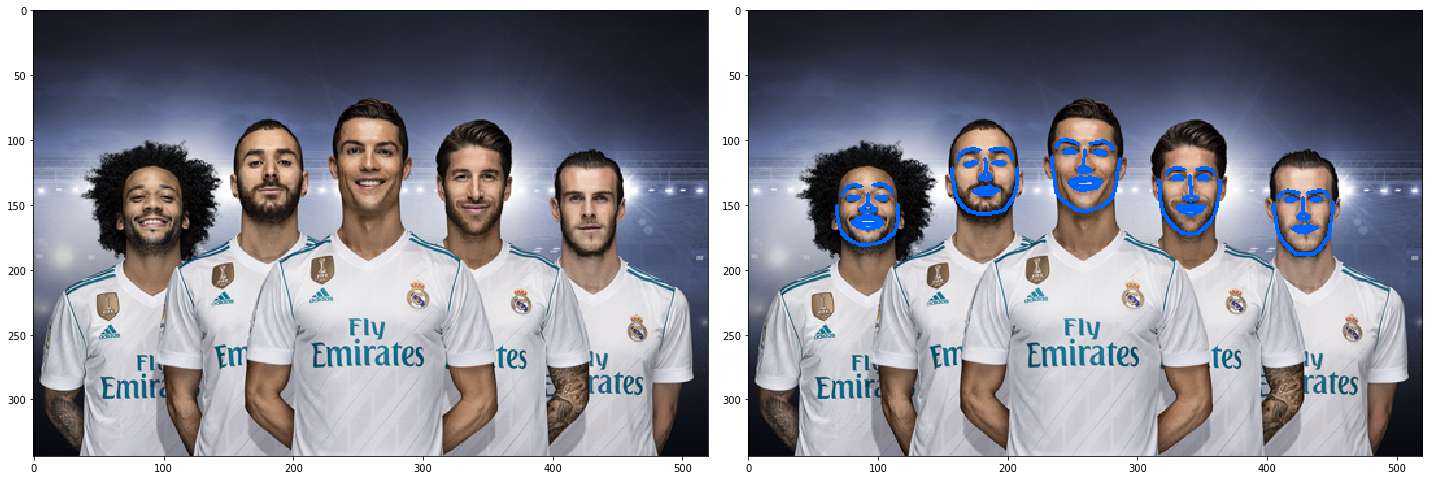

In [41]:
f, ax = plt.subplots(1, 2, figsize=(20, 15))
plt.subplot(121)
plt.imshow(origin)
plt.subplot(122)
plt.imshow(im)
plt.tight_layout()
plt.show()